# HW4 Regression, regularization, and Generalized Linear Models (GLMs).


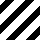
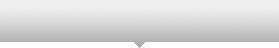
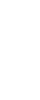
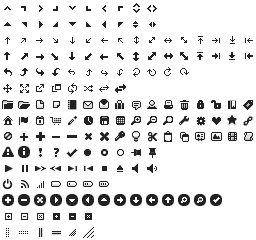
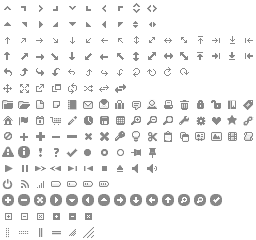
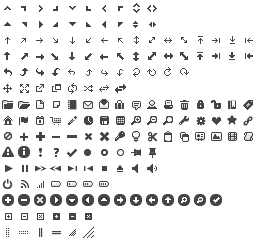
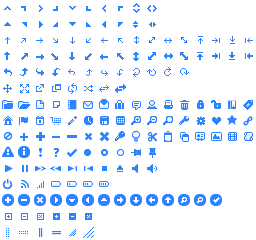
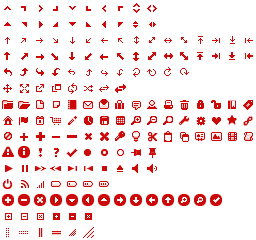
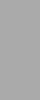
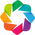
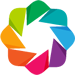
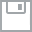
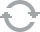
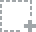
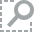
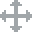
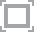
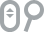

In [4]:
#usual imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bokeh.plotting import figure,show,output_notebook
output_notebook()

%matplotlib inline

# Statsmodel APIs
import statsmodels.api as sm

## 1. A projectile is fired upwards from the ground. The height of the projectile above the ground is shown in the following table:


| Time(s)  | 0 | 0.5  | 1     | 1.5   | 2     | 2.5   |
|---|---|------|-------|-------|-------|-------|
| Height (f)  | 0 | 20.5 | 31.36 | 36.25 | 30.41 | 28.23 |
￼￼￼￼￼￼￼￼￼￼￼￼￼

/Users/raymondma/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


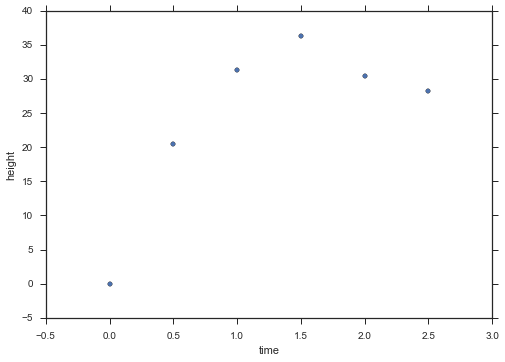

In [5]:
times = np.array([0,0.5,1,1.5,2,2.5])
height = np.array([0,20.5,31.36,36.25,30.41,28.23])

df = pd.DataFrame(zip(times,height), columns = ['time','height'])

#plot
sns.set(style="ticks")
df.plot(x='time', y='height', kind="scatter")

### Linear Model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     4.318
Date:                Mon, 23 Nov 2015   Prob (F-statistic):              0.106
Time:                        18:05:04   Log-Likelihood:                -21.178
No. Observations:                   6   AIC:                             46.36
Df Residuals:                       4   BIC:                             45.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            10.0440      4.833      2.078      0.1

/Users/raymondma/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


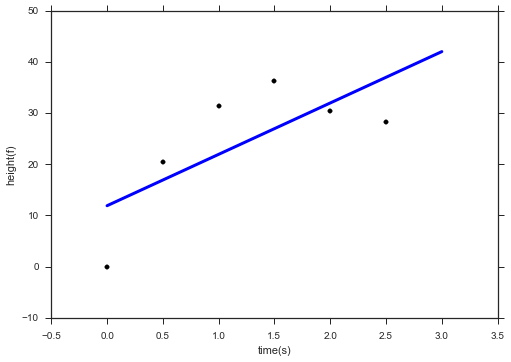

In [6]:
#linear model
TIME = np.vander(times, 1+1)
res = sm.OLS(height, TIME).fit()
print res.summary()
xx = np.linspace(0,3,100)
plt.scatter(times, height,  color='black')
plt.ylabel('height(f)')
plt.xlabel('time(s)')
plt.plot(xx, res.predict(np.vander(xx,2)), color='blue',
         linewidth=3)

### Quadratic Model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     55.76
Date:                Mon, 23 Nov 2015   Prob (F-statistic):            0.00424
Time:                        18:05:05   Log-Likelihood:                -12.448
No. Observations:                   6   AIC:                             30.90
Df Residuals:                       3   BIC:                             30.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           -12.8714      1.784     -7.216      0.0

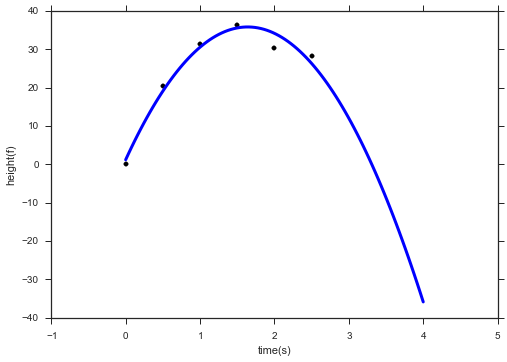

In [7]:
#Quadratic Model
TIME = np.c_[times**2, times, np.ones(len(times))]
res = sm.OLS(height, TIME).fit()
print res.summary()
xx = np.linspace(0,4,100)
plt.ylabel('height(f)')
plt.xlabel('time(s)')
plt.scatter(times, height,  color='black')
plt.plot(xx, res.predict(np.vander(xx,3)), color='blue',
         linewidth=3)

### According to the quadratic regression, the projectile would hit the ground around 3.308 seconds.

In [8]:
# Projectile hits 0 between 3 and 3.5
xxx = np.linspace(3,3.5,100)
results_arr = res.predict(np.vander(xxx,3))

resArr = zip(xxx, results_arr)
resDF = pd.DataFrame(resArr)
print resDF[0][resDF[1]<0].head()

61    3.308081
62    3.313131
63    3.318182
64    3.323232
65    3.328283
Name: 0, dtype: float64


## 2. Healthcare costs have been increasing over the years. The following data shows the average cost of healthcare per person from 1976 to 1998: Year 1976 1980 1987 1993 1998 Cost (per person) 618 860 1324 1865 2256 a) Find a model that fits the data well. b) Find the time the average healthcare cost will reach $2800 per person.

| Year  | 1976 | 1980  | 1987     | 1993   | 1998     |
|---|---|------|-------|-------|-------|
| Cost  | 618 | 860 | 1324 | 1865 | 2256 |


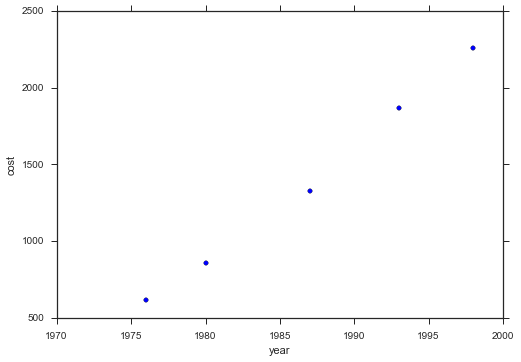

In [9]:
year = np.array([1976, 1980, 1987, 1993, 1998])
cost = np.array([618, 860, 1324, 1865, 2256])

#plot
plt.scatter(year, cost)
plt.ylabel('cost')
plt.xlabel('year')


------linear----
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     614.3
Date:                Mon, 23 Nov 2015   Prob (F-statistic):           0.000144
Time:                        18:05:05   Log-Likelihood:                -25.840
No. Observations:                   5   AIC:                             55.68
Df Residuals:                       3   BIC:                             54.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            75.1916      3.034   

/Users/raymondma/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


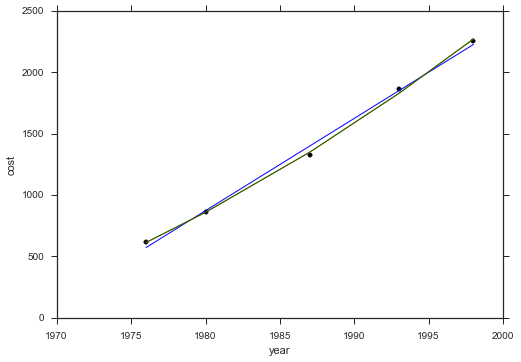

In [10]:
# linear regression model

#linear model
X_linear = np.vander(year, 1+1)
res = sm.OLS(cost, X_linear).fit()
plt.ylabel('cost')
plt.xlabel('year')
print '------linear----'
print res.summary()
plt.scatter(year, cost,  color='black')
plt.plot(year, res.predict(np.vander(year,2)), color='blue',
         linewidth=1)

# X_quadratic  = np.vander(year**2, 3)
# res = sm.OLS(cost, X_quadratic).fit()

#Quadratic Model
X_quad = np.c_[year**2, year, np.ones(len(year))]
res_quad = sm.OLS(cost, X_quad).fit()
print '-----quadratic----'
print res_quad.summary()
plt.plot(year, res_quad.predict(np.vander(year,3)), color='red',
         linewidth=1)

#Cubic Model
X_cube = np.c_[year**3,year**2, year, np.ones(len(year))]
res_cube = sm.OLS(cost, X_cube).fit()
print '-----cubic----'
print res_cube.summary()
plt.plot(year, res_cube.predict(np.vander(year,4)), color='green',
         linewidth=1)

In [11]:
#predict year to $2800
xxx = np.linspace(2000,2005,20)
X_quad = np.c_[year**2, year, np.ones(len(year))]
res_quad = sm.OLS(cost, X_quad).fit()
print res_quad.predict(np.vander(xxx,3))
print xxx

[ 2458.66776734  2483.80520764  2509.04910212  2534.39945079  2559.85625363
  2585.41951066  2611.08922187  2636.86538726  2662.74800683  2688.73708058
  2714.83260852  2741.03459064  2767.34302694  2793.75791742  2820.27926208
  2846.90706092  2873.64131395  2900.48202116  2927.42918255  2954.48279812]
[ 2000.          2000.26315789  2000.52631579  2000.78947368  2001.05263158
  2001.31578947  2001.57894737  2001.84210526  2002.10526316  2002.36842105
  2002.63157895  2002.89473684  2003.15789474  2003.42105263  2003.68421053
  2003.94736842  2004.21052632  2004.47368421  2004.73684211  2005.        ]


### The quadratic model results in a r-squared value of .99 which is better than the linear model and close to the cubic model. Since quadratic achieves simlar r-squared value than the higher order models at less complexity. We will be using this to predict when the healthcare cost will reach $2800 a person

with the quadratic model, the $2800, mark is reached around 2003

In [12]:
#Quadratic Model
xxx = np.linspace(2000,2005,20)
X_quad = np.c_[year**2, year, np.ones(len(year))]
res_quad = sm.OLS(cost, X_quad).fit()
print zip(xxx,res_quad.predict(np.vander(xxx,3)))


[(2000.0, 2458.6677673440427), (2000.2631578947369, 2483.8052076427266), (2000.5263157894738, 2509.0491021247581), (2000.7894736842106, 2534.3994507873431), (2001.0526315789473, 2559.856253631413), (2001.3157894736842, 2585.4195106588304), (2001.578947368421, 2611.0892218668014), (2001.8421052631579, 2636.8653872571886), (2002.1052631578948, 2662.7480068290606), (2002.3684210526317, 2688.7370805833489), (2002.6315789473683, 2714.832608519122), (2002.8947368421052, 2741.0345906354487), (2003.1578947368421, 2767.3430269351229), (2003.421052631579, 2793.7579174153507), (2003.6842105263158, 2820.279262078926), (2003.9473684210527, 2846.9070609239861), (2004.2105263157894, 2873.6413139505312), (2004.4736842105262, 2900.4820211585611), (2004.7368421052631, 2927.4291825480759), (2005.0, 2954.4827981209382)]


## 3. Random Datast model fit + regularization 
| X  | -1 | 0  | 1 | 2  | 3 | 5 | 7 | 9 |
|----|----|----|---|----|---|---|---|---|
| Y  | -1 | 3 | 2.5 | 5 | 4 | 2 | 5 | 4 |

------linear----
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     2.700
Date:                Mon, 23 Nov 2015   Prob (F-statistic):              0.151
Time:                        19:13:08   Log-Likelihood:                -14.763
No. Observations:                   8   AIC:                             33.53
Df Residuals:                       6   BIC:                             33.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.3143      0.191   

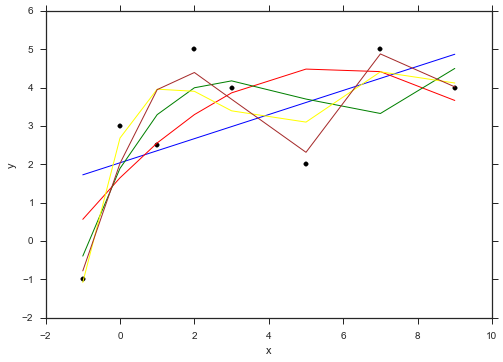

In [27]:
x = np.array([-1, 0, 1, 2, 3, 5, 7, 9])
y = np.array([-1, 3, 2.5, 5, 4, 2, 5, 4])

# linear regression model

#linear model
X_linear = np.vander(x, 1+1)
res = sm.OLS(y, X_linear).fit()
plt.ylabel('y')
plt.xlabel('x')
print '------linear----'
print res.summary()
plt.scatter(x, y,  color='black')
plt.plot(x, res.predict(np.vander(x,2)), color='blue',
         linewidth=1)

# X_quadratic  = np.vander(year**2, 3)
# res = sm.OLS(cost, X_quadratic).fit()

#Quadratic Model
X_quad = np.c_[x**2, x, np.ones(len(x))]
res_quad = sm.OLS(y, X_quad).fit()
print '-----quadratic----'
print res_quad.summary()
plt.plot(x, res_quad.predict(np.vander(x,3)), color='red',
         linewidth=1)

#Cubic Model
X_cube = np.c_[x**3,x**2, x, np.ones(len(x))]
res_cube = sm.OLS(y, X_cube).fit()
print '-----cubic----'
print res_cube.summary()
plt.plot(x, res_cube.predict(np.vander(x,4)), color='green',
         linewidth=1)

#Quartic Model
X_quart = np.c_[x**4,x**3,x**2, x, np.ones(len(x))]
res_quart = sm.OLS(y, X_quart).fit()
print '-----quartic-----'
print res_quart.summary()
plt.plot(x, res_quart.predict(np.vander(x,5)), color='yellow',
         linewidth=1)

#Quintic Model
X_quint = np.c_[x**5,x**4,x**3,x**2, x, np.ones(len(x))]
res_quint = sm.OLS(y, X_quint).fit()
print '-----quintic-----'
print res_quint.summary()
plt.plot(x, res_quint.predict(np.vander(x,6)), color='brown',
         linewidth=1)



### a.) From the summary value tables above, the Adj. R-squared value starts to decrease right after the quartic regression model. 

In [14]:
from sklearn.linear_model import Ridge, Lasso


### B.) Ridge gregression seems to fit the data better (tested with alpha = 1 and alpha = 6)  than the Lasso Regularization

In [54]:
ridge = Ridge(alpha = 1)
ridge.fit(np.vander(x, 5), y)

ridge2 = Ridge(alpha = 6)
ridge2.fit(np.vander(x, 5), y)

lasso = Lasso(alpha = 1)
lasso.fit(np.vander(x, 5), y)

lasso2 = Lasso(alpha = 6)
lasso2.fit(np.vander(x, 5), y)

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-2,10,100)
# p.line(xx, res.predict(np.vander(xx,5)), color='pink')
p.line(xx, ridge.predict(np.vander(xx,5)), color='green')
p.line(xx, ridge2.predict(np.vander(xx,5)), color='black')
p.line(xx, lasso.predict(np.vander(xx,5)), color='cyan')
p.line(xx, lasso2.predict(np.vander(xx,5)), color='red')
show(p)

print ridge.score(np.vander(x,5),y)
print ridge2.score(np.vander(x,5),y)
print lasso.score(np.vander(x, 5),y)
print lasso2.score(np.vander(x,5),y)


0.749538887085
0.501731161783
0.19599756334
0.161831741381


## 4. - 8. Red wine quality

In [87]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',header=0, sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


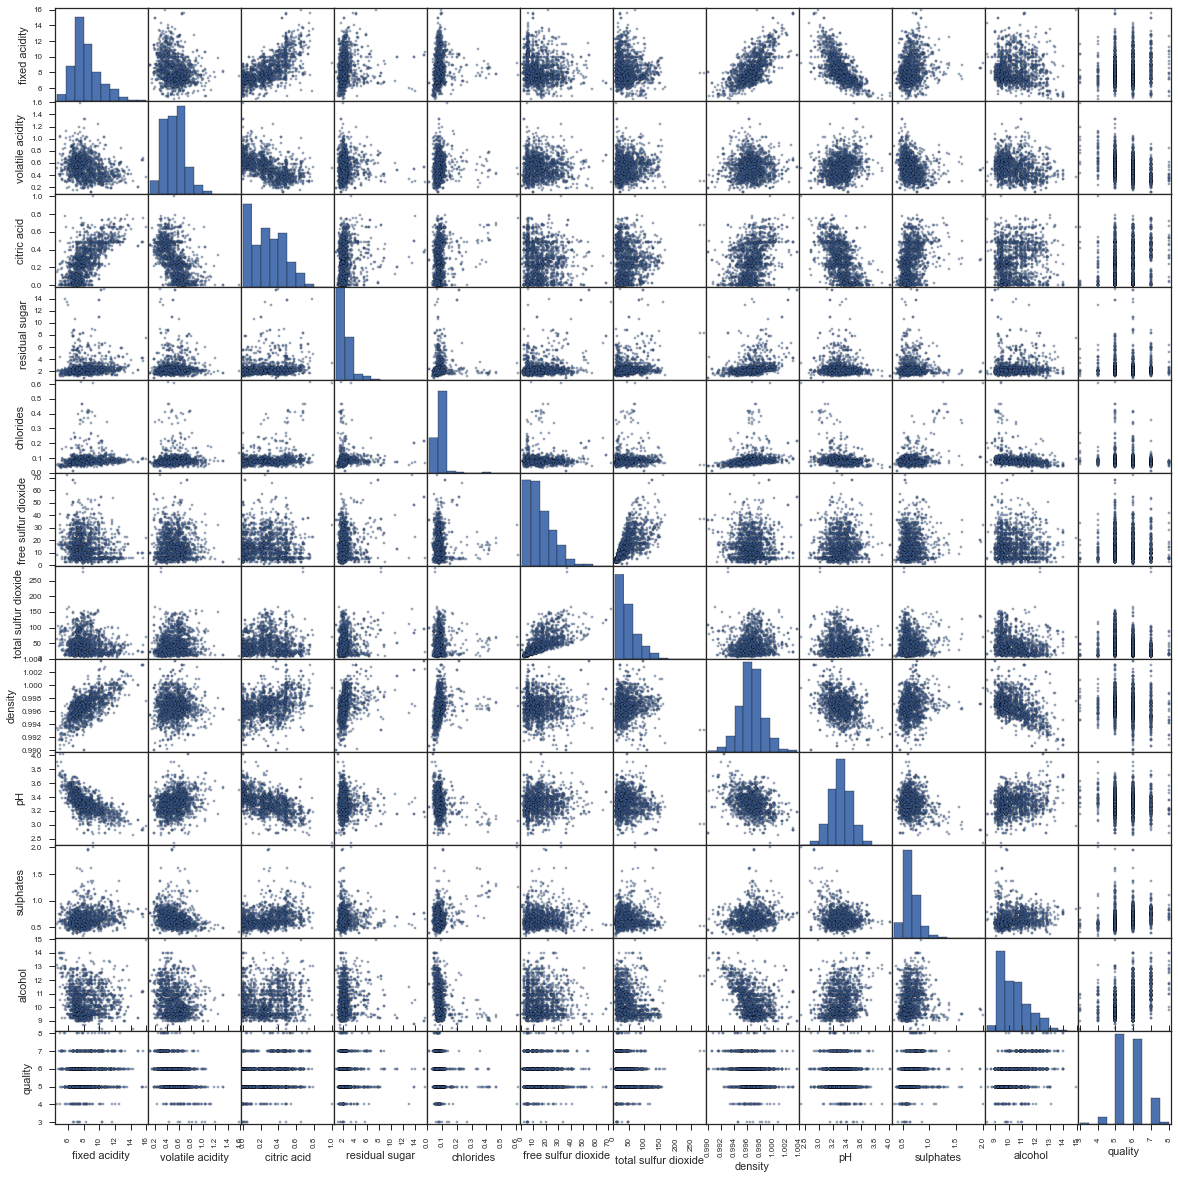

In [88]:
mat_plot = pd.tools.plotting.scatter_matrix(wine_df, figsize= (20,20))

In [49]:
#grab feature values
features = wine_df.columns[:11]
print len(features)

11


### a. The features that seme correlated or at least the most correlated to quality is alcohol level, denisty, and maybe volatile acidity .

### b. Most of the quality scoress are 5 and 6 and not normally distributed.

### c. 11 features which are not normalized

In [56]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [78]:
features_arr = wine_df.drop('quality',axis = 1).values
quality_arr = wine_df.quality.values
features_arr

array([[  7.4  ,   0.7  ,   0.   , ...,   3.51 ,   0.56 ,   9.4  ],
       [  7.8  ,   0.88 ,   0.   , ...,   3.2  ,   0.68 ,   9.8  ],
       [  7.8  ,   0.76 ,   0.04 , ...,   3.26 ,   0.65 ,   9.8  ],
       ..., 
       [  6.3  ,   0.51 ,   0.13 , ...,   3.42 ,   0.75 ,  11.   ],
       [  5.9  ,   0.645,   0.12 , ...,   3.57 ,   0.71 ,  10.2  ],
       [  6.   ,   0.31 ,   0.47 , ...,   3.39 ,   0.66 ,  11.   ]])

In [186]:
# linear model
X_linear = sm.add_constant(features_arr, prepend=True)
res = sm.OLS(quality_arr, X_linear).fit()
print '------linear----'
print res.summary()


------linear----
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 24 Nov 2015   Prob (F-statistic):          1.79e-145
Time:                        09:41:39   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.9652     21.195   

In [124]:
from sklearn.preprocessing import normalize

features_norm = (features_arr - features_arr.mean())/features_arr.std()
features_norm2 = normalize(features_arr, axis = 0)


In [188]:
# linear model normalized
X = sm.add_constant(features_arr, prepend=True)
res = sm.OLS(quality_arr, X).fit()
print '------linear----'
print res.summary()

------linear----
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 24 Nov 2015   Prob (F-statistic):          1.79e-145
Time:                        09:42:40   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.9652     21.195   

In [170]:
# Plot Coefficients
from bokeh.models import Range1d

feature_names =features

p = figure(title="Model Coefficients")

coefficients=res.params

x = np.arange(len(feature_names))
for val in x:
    p.quad(top = coefficients[val+1], bottom=0, left=val+0.2,
           right=val+0.8, color=['red','orange','green','purple','blue','cyan','magenta','red','orange','purple','blue'][val],legend=feature_names[val])
p.y_range = Range1d(min(coefficients)-0.1, max(coefficients)+1.5)
show(p)


### There is a class imbalance in the rating of wines that heavily favors ratings of 5 and 6. As you can see form the attached png label wine_hist_basic_linear.png our regression model is a little too generous at handing out 5 and 6's. Since only 4 or 5 ratings were selected we could maybe try fitting the data into a logistic regression model to accomodate the class imbalance as well as the discrete nature of the data

In [197]:
from bokeh.charts import Histogram
from collections import OrderedDict

# to see how basic regression model compares to actual data

predicted = []

for n in X:
    predicted.append(round(res.predict(n)))
    
# plot 

comparisons = OrderedDict(actual = quality_arr, predicted = predicted)
comparison_df = pd.DataFrame(comparisons)
comparisons = comparison_df.to_dict()
for k, v in comparisons.items():
    comparisons[k] = v.values()

hist = Histogram(comparison_df, bins=10, legend=True)

show(hist)



In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

model_lr = LogisticRegression(C=4).fit(X,quality_arr)

print cross_val_score(model_lr,X, quality_arr,cv=3).mean()


predicted_log = []

for n in X:
    predicted_log.append(round(model_lr.predict(n)))
    
# plot 

comparisons = OrderedDict(actual = quality_arr, predicted = predicted_log)
comparison_df = pd.DataFrame(comparisons)
comparisons = comparison_df.to_dict()
for k, v in comparisons.items():
    comparisons[k] = v.values()

hist = Histogram(comparison_df, bins=10, legend=True)

show(hist)

#higher score, but the from the distribution 5 and 6 become even more imbalanced than before.


0.559151496367


### Regularization

In [226]:
ridge = Ridge(alpha = 1)
ridge.fit(X,quality_arr)
print ridge.score(X,quality_arr)

lasso = Lasso(alpha = 1)
lasso.fit(X,quality_arr)
print lasso.score(X,quality_arr)

0.359479854247
0.032843336246
